[0.00000000e+00 2.05364395e-01 1.66654521e-01 2.61925389e-01
 3.83043207e-01 5.36449733e-01 6.43512393e-01 7.08795974e-01
 7.71388802e-01 8.31518102e-01 8.89370159e-01 9.45101295e-01
 9.98845157e-01 1.05071776e+00 1.10082111e+00 1.14924583e+00
 1.19607319e+00 1.26272266e+00 1.34773945e+00 1.42748064e+00
 1.50233927e+00 1.57265681e+00 1.63873391e+00 1.70083811e+00
 1.75920964e+00 1.81406582e+00 1.86560457e+00 1.91400709e+00
 1.96999066e+00 2.03194171e+00 2.09653827e+00 2.15467569e+00
 2.19887415e+00 2.24446404e+00 2.29486547e+00 2.34128870e+00
 2.37831850e+00 2.40694069e+00 2.42802857e+00 2.44235960e+00
 2.45200669e+00 2.44827880e+00 2.42789160e+00 2.39418835e+00
 2.34991916e+00 2.29735733e+00 2.23838836e+00 2.17457937e+00
 2.10723418e+00 2.03743761e+00 1.96609131e+00 1.87621737e+00
 1.76792415e+00 1.66105743e+00 1.55677074e+00 1.43994159e+00
 1.31263188e+00 1.19329552e+00 1.08228487e+00 9.79649938e-01
 8.85231487e-01 7.98729361e-01 7.01865071e-01 5.98919386e-01
 4.97203699e-01 4.106595

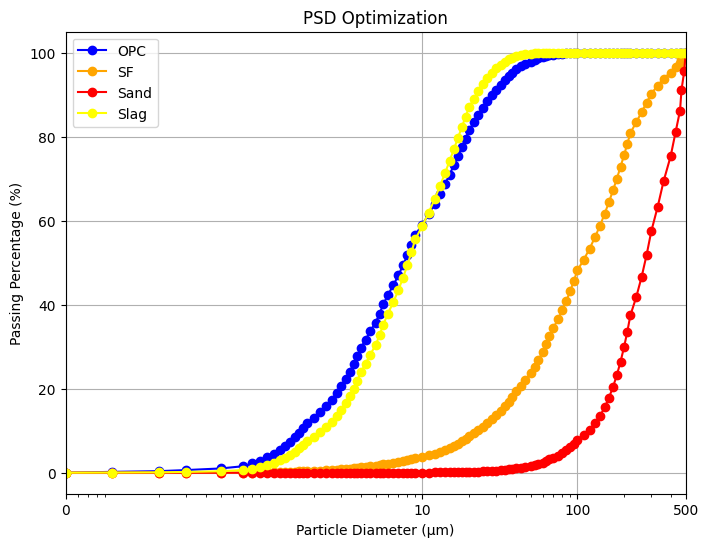

bindaa
[0.         0.08523621 0.07006785 0.1108801  0.16335102 0.23054391
 0.27789856 0.30697282 0.33497918 0.36200306 0.38811431 0.41337148
 0.43782457 0.46151694 0.48448675 0.50676787 0.52839071 0.55930756
 0.59896446 0.63640497 0.67177753 0.70521157 0.73682155 0.76670979
 0.79496867 0.82168223 0.84692744 0.87077523 0.89854584 0.92951776
 0.96213559 0.9917973  1.01459455 1.03838052 1.06507255 1.09015557
 1.11069641 1.12712951 1.13984641 1.14920153 1.15725425 1.15961776
 1.15345618 1.14043008 1.12193805 1.09916018 1.07309249 1.04457479
 1.01431366 0.98290169 0.95083379 0.91061696 0.86254718 0.81568745
 0.77065051 0.72120134 0.66868578 0.6210328  0.57832754 0.54049274
 0.50734583 0.47864015 0.44887914 0.42050984 0.39716783 0.38210795
 0.37549068 0.37397976 0.37785151 0.38516192 0.39767123 0.4190579
 0.44873117 0.48368472 0.5230961  0.56632355 0.61286078 0.68769082
 0.79620866 0.91260148 1.03535783 1.16317217 1.29482863 1.42914166
 1.5649292  1.70100458 1.83617902 1.96927012 2.09911349 

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Full path to your Excel file
excel_file = r"UHPC.xlsx"
df = pd.read_excel(excel_file, sheet_name='Sheet2')

# Extract columns from the DataFrame
A = df['Cement'].values
B = df['Silica Fume'].values
C = df['Sand'].values
D = df['Slag'].values
print(A)
print(np.cumsum(A))
d = df['Particle diameter'].values

plt.figure(figsize=(8, 6))
d_plot = d  # Exclude the first element from x-axis values
print(d_plot)
plt.plot(d_plot, np.cumsum(A), label=f'OPC', color='blue', marker='o')
plt.plot(d_plot, np.cumsum(B), label=f'SF', color='orange', marker='o')
plt.plot(d_plot, np.cumsum(C), label=f'Sand', color='red', marker='o')
plt.plot(d_plot, np.cumsum(D), label=f'Slag', color='yellow', marker='o')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Particle Diameter (μm)')
plt.ylabel('Passing Percentage (%)')
plt.title('PSD Optimization')


plt.xlim(left=d_plot.min(), right=500)
formatter = FuncFormatter(lambda x, _: f'{x:.0f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks([d_plot.min(), 10, 100, 500])

plt.legend()
plt.grid(True)

plt.show()

def optimal_psd_function(d, q, min_d, max_d):
    d = np.array(d)
    alpha = (((d**q) - (min_d**q)) / ((max_d**q) - (min_d**q))) * 100
    return alpha

d = df['Particle diameter']
q = 0.25
min_d = 0.1
max_d = 500

alpha = optimal_psd_function(d, q, min_d, max_d)

# Define densities for the components (g/cm^3)
Density_OPC = 3.15
Density_SF = 2.2
Density_SS = 2.6
Density_Slag = 2.85

# Fixed value for Weight_OPC
Weight_OPC = 1.0

# Define the RMSE function to minimize
def rmse_function(weights):
    Weight_SF, Weight_SS, Weight_Slag = weights
    Total_Volume = (Weight_OPC / Density_OPC 
                    + Weight_SF / Density_SF 
                    + Weight_SS / Density_SS 
                    + Weight_Slag / Density_Slag)
    
    # Calculate Binder based on the provided formula
    Binder = (A * Weight_OPC / (Total_Volume * Density_OPC)
              + B * Weight_SF / (Total_Volume * Density_SF)
              + C * Weight_SS / (Total_Volume * Density_SS)
              + D * Weight_Slag / (Total_Volume * Density_Slag))
    
    print("bindaa")
    print(Binder)
    # Create a cumulative column based on Binder
    cumulative = np.cumsum(Binder)

    # Save cumulative to be used for MAE calculation
    rmse_function.cumulative = cumulative
    rmse = np.sqrt(np.mean((alpha[1:100] - cumulative[1:100])**2))
    return rmse

rmse_function([0.1, 1.0, 1.0 / 10])
rmse_function([1, 0.1, 1.0 / 10])
# Initial guess for the weights [Weight_SF, Weight_SS, Weight_Slag]
initial_guess = [0.1, 1, 1.0 / 10]  # An initial guess within the acceptable range for Weight_Slag

# Function to dynamically set bounds for weights
def get_bounds():
    return [(0, 0.2), (1, None), (0, None)]

# List of optimization methods that support bounds
methods = ['L-BFGS-B', 'TNC', 'SLSQP']

for method in methods:
    bounds = get_bounds()
    result = minimize(rmse_function, initial_guess, bounds=bounds, method=method)
    
    # Extract the optimal weights
    optimal_weights = result.x
    
    # Calculate the cumulative Binder values for the optimal weights
    cumulative = rmse_function.cumulative

    # Calculate MAE
    mae = np.mean(np.abs(alpha[1:100] - cumulative[1:100]))
    
    # Print the method used, optimal weights, minimum RMSE, and MAE
    print(f"Method: {method}")
    print("Optimal weights (with Weight_OPC fixed at 1.0):")
    print("Weight_OPC = {:.3f}".format(Weight_OPC))
    print("Weight_SF = {:.3f}".format(optimal_weights[0]))
    print("Weight_SS = {:.3f}".format(optimal_weights[1]))
    print("Weight_Slag = {:.3f}".format(optimal_weights[2]))
    print("Minimum RMSE = {:.3f}".format(result.fun))
    print("MAE = {:.3f}".format(mae))


[0.00000000e+00 4.00872899e-02 5.14199416e-02 9.67593432e-02
 1.66734455e-01 2.70747415e-01 3.52953988e-01 4.07212050e-01
 4.61932959e-01 5.16970376e-01 5.72200997e-01 6.27519374e-01
 6.82834243e-01 7.38065835e-01 7.93143873e-01 8.48006029e-01
 9.02596720e-01 9.83108279e-01 1.09016181e+00 1.19536881e+00
 1.29849078e+00 1.39933086e+00 1.49772646e+00 1.59354372e+00
 1.68667307e+00 1.77702578e+00 1.86453112e+00 1.94913401e+00
 2.05019021e+00 2.16602343e+00 2.29198501e+00 2.41004318e+00
 2.50342085e+00 2.60350245e+00 2.71930942e+00 2.83200121e+00
 2.92781128e+00 3.00751994e+00 3.07196660e+00 3.12202914e+00
 3.17029192e+00 3.19569593e+00 3.17962712e+00 3.12889798e+00
 3.04983834e+00 2.94821498e+00 2.82919466e+00 2.69733771e+00
 2.55661307e+00 2.41042759e+00 2.26166456e+00 2.07656578e+00
 1.85827295e+00 1.64964059e+00 1.45389583e+00 1.24552457e+00
 1.03254111e+00 8.47969916e-01 6.90504503e-01 5.57951118e-01
 4.47661130e-01 3.56833746e-01 2.67513137e-01 1.86357218e-01
 1.21208394e-01 7.683956

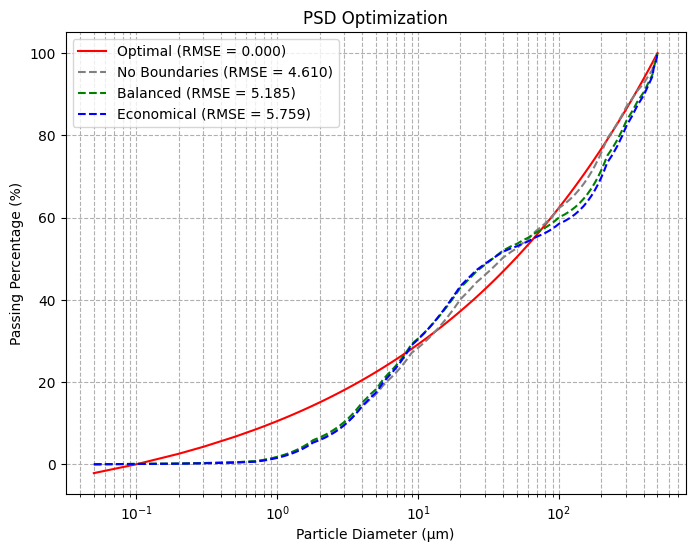

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def create_graph():
    # Full path to your Excel file
    excel_file = r"UHPC.xlsx"
    df = pd.read_excel(excel_file, sheet_name='Sheet2')

    # Extract columns from the DataFrame
    A = df['Cement'].values
    B = df['Silica Fume'].values
    C = df['Sand'].values
    D = df['Slag'].values
    d = df['Particle diameter'].values

    print(D)
    def optimal_psd_function(d, q, min_d, max_d):
        d = np.array(d)
        alpha = (((d**q) - (min_d**q)) / ((max_d**q) - (min_d**q))) * 100
        return alpha

    q = 0.25
    min_d = 0.1
    max_d = 500

    alpha = optimal_psd_function(d, q, min_d, max_d)

    # Define densities for the components (g/cm^3)
    Density_OPC = 3.15
    Density_SF = 2.2
    Density_SS = 2.6
    Density_Slag = 2.85

    # Fixed value for Weight_OPC
    Weight_OPC = 1.0

    # Define the RMSE function to minimize
    def rmse_function(weights):
        Weight_SF, Weight_SS, Weight_Slag = weights
        Total_Volume = (Weight_OPC / Density_OPC 
                        + Weight_SF / Density_SF 
                        + Weight_SS / Density_SS 
                        + Weight_Slag / Density_Slag)
        
        # Calculate Binder based on the provided formula
        Binder = (A * Weight_OPC / (Total_Volume * Density_OPC)
                + B * Weight_SF / (Total_Volume * Density_SF)
                + C * Weight_SS / (Total_Volume * Density_SS)
                + D * Weight_Slag / (Total_Volume * Density_Slag))
        
        # Create a cumulative column based on Binder
        cumulative = np.cumsum(Binder)

        # Save cumulative to be used for MAE calculation
        rmse_function.cumulative = cumulative
        rmse = np.sqrt(np.mean((alpha - cumulative)**2))
        return rmse

    # Optimization with no boundaries
    initial_guess = [0.1, 1.0, 1.0 / 10]
    bounds_no_boundaries = [(0, None), (0, None), (0, None)]
    result_no_boundaries = minimize(rmse_function, initial_guess, bounds=bounds_no_boundaries, method='L-BFGS-B')
    optimal_weights_no_boundaries = result_no_boundaries.x
    No_Boundaries = rmse_function.cumulative

    # Optimization with specific bounds
    def get_bounds_balanced():
        return [(0, 0.2), (0, None), (0.091, None)]

    result_balanced = minimize(rmse_function, initial_guess, bounds=get_bounds_balanced(), method='L-BFGS-B')
    optimal_weights_balanced = result_balanced.x
    Balanced = rmse_function.cumulative

    def get_bounds_economical():
        return [(0, 0.2), (1, None), (0, None)]

    result_economical = minimize(rmse_function, initial_guess, bounds=get_bounds_economical(), method='L-BFGS-B')
    optimal_weights_economical = result_economical.x
    Economical = rmse_function.cumulative

    # Calculate RMSE values
    def calculate_rmse(true_values, predicted_values):
        return np.sqrt(np.mean((true_values - predicted_values)**2))

    # RMSE calculations
    rmse_no_boundaries = calculate_rmse(alpha, No_Boundaries)
    rmse_balanced = calculate_rmse(alpha, Balanced)
    rmse_economical = calculate_rmse(alpha, Economical)

    # Print RMSE values and optimal weights
    print(f"Optimal weights for No Boundaries:")
    print(f"Weight_OPC = {Weight_OPC:.3f}")
    print(f"Weight_SF = {optimal_weights_no_boundaries[0]:.3f}")
    print(f"Weight_SS = {optimal_weights_no_boundaries[1]:.3f}")
    print(f"Weight_Slag = {optimal_weights_no_boundaries[2]:.3f}")
    print(f"RMSE for No Boundaries: {rmse_no_boundaries:.3f}")

    print(f"\nOptimal weights for Balanced:")
    print(f"Weight_OPC = {Weight_OPC:.3f}")
    print(f"Weight_SF = {optimal_weights_balanced[0]:.3f}")
    print(f"Weight_SS = {optimal_weights_balanced[1]:.3f}")
    print(f"Weight_Slag = {optimal_weights_balanced[2]:.3f}")
    print(f"RMSE for Balanced: {rmse_balanced:.3f}")

    print(f"\nOptimal weights for Economical:")
    print(f"Weight_OPC = {Weight_OPC:.3f}")
    print(f"Weight_SF = {optimal_weights_economical[0]:.3f}")
    print(f"Weight_SS = {optimal_weights_economical[1]:.3f}")
    print(f"Weight_Slag = {optimal_weights_economical[2]:.3f}")
    print(f"RMSE for Economical: {rmse_economical:.3f}")

    # Exclude the first entry for each dataset
    d_plot = d  # Exclude the first element from x-axis values
    alpha_plot = alpha  # Exclude the first element from alpha values
    No_Boundaries_plot = No_Boundaries  # Exclude the first element from No Boundaries values
    Balanced_plot = Balanced  # Exclude the first element from Balanced values
    Economical_plot = Economical  # Exclude the first element from Economical values

    # Plotting the results
    plt.figure(figsize=(8, 6))
    print(alpha_plot)
    plt.plot(d_plot, alpha_plot, label=f'Optimal (RMSE = {calculate_rmse(alpha, alpha_plot):.3f})', color='red')
    plt.plot(d_plot, No_Boundaries_plot, label=f'No Boundaries (RMSE = {rmse_no_boundaries:.3f})', color='grey', linestyle='--')
    plt.plot(d_plot, Balanced_plot, label=f'Balanced (RMSE = {rmse_balanced:.3f})', color='green', linestyle='--')
    plt.plot(d_plot, Economical_plot, label=f'Economical (RMSE = {rmse_economical:.3f})', color='blue', linestyle='--')
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.xlabel('Particle Diameter (μm)')
    plt.ylabel('Passing Percentage (%)')
    plt.title('PSD Optimization')
    plt.legend()
    plt.grid(True, which="both", ls="--")  # Show grid for both major and minor ticks


    # Define
    save_path_pic = r'uhpc.png'

    # Save the plot as a STL file
    plt.savefig(save_path_pic, format='PNG', dpi=300)
    plt.show()
    plt.close()

create_graph()